# Geographical-2-Cartesian Coordinates Transformation
- 3D Radius through three GPS coorinates
- working with numpy and pandas

In [1]:
import folium
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

# Enter GPS coordinates 
- manuel input
- load csv-file
- load gpx-filE

In [2]:
lat1 = 47.6759701914
lon1 = 10.3931548094

lat2 = 47.6759492022
lon2 = 10.4044835488

lat3 = 47.6724410868
lon3 = 10.4107607062

lon4 = 0
lat4 = 0

In [3]:
gpsp1 =[lat1,lon1]
gpsp2 =[lat2,lon2]
gpsp3 =[lat3,lon3]
gpsp4 = [lat4,lon4]

#Numpy array with gpspoints
arr = np.array([gpsp1,gpsp2,gpsp3,gpsp4])
arr

array([[ 47.67597019,  10.39315481],
       [ 47.6759492 ,  10.40448355],
       [ 47.67244109,  10.41076071],
       [  0.        ,   0.        ]])

# from np.array to pandas.DataFrame

In [4]:
#pandas DataFrame
dfgps = pd.DataFrame(arr,columns=['lat','lon'])
dfgps

,lat,lon
0,47.675970,10.393155
1,47.675949,10.404484
2,47.672441,10.410761
3,0.000000,0.000000


In [5]:
dfgps.values[1][1]

10.4044835488

In [6]:
refpoint = dfgps.values[0]
refpoint

array([ 47.67597019,  10.39315481])

# Transformation geographic to cartesian coordinates

In [7]:
#npoints = ([lat1,lon1],[lat2,lon2],[lat3,lon3])
#input pandas.DataFrame
def transform_geo_2_cart(npoints):
    #nparray = pandasDataFrame
    array = npoints.values
    #output transfomlist
    lsx = []
    lsy = []
    for i in range(len(array)-1):        
        #radius der Erde in meter
        R = 6378137
        #Exzentrizität
        en = 0.0818191908426
        #Pi, sin
        pi = math.pi
        #Radius Richtung Norden
        Rn = (R*(1-en*en))/((1-en*en*math.sin(array[0][0])*math.sin(array[0][0]))**1.5)
        #Radius Richtung Osten
        Ro = R/((1-en**2*math.sin(array[0][0])**2)**(0.5))
        #Skalierungsfaktor Norden in m/° Abstand in Meter nach Norden, zwischen Breitengraden
        SFn=Rn*(pi/180)
        #Skalierungsfaktor Osten in m/° Abstand in Meter nach Osten, zwischen Längengraden
        SFo=Ro*(pi/180)*math.cos(array[0][0]*pi/180)
        #Abstand zwischen den beiden GPS-Punkten in Y-Richtung Norden in Meter
        Sx = (array[i][1]-array[0][1])*SFo
        lsx.append(Sx)
        #Abstand zwischen den beiden GPS-Punkten in X-Richtung Osten in Meter
        Sy = (array[i][0]-array[0][0])*SFn
        lsy.append(Sy)
        
    arr = np.column_stack((lsx,lsy))
    cart = pd.DataFrame(arr,columns=['x','y'])
    return cart

In [8]:
cartcoord = transform_geo_2_cart(dfgps)

# plot cartesian coordinates

<IPython.core.display.Javascript object>


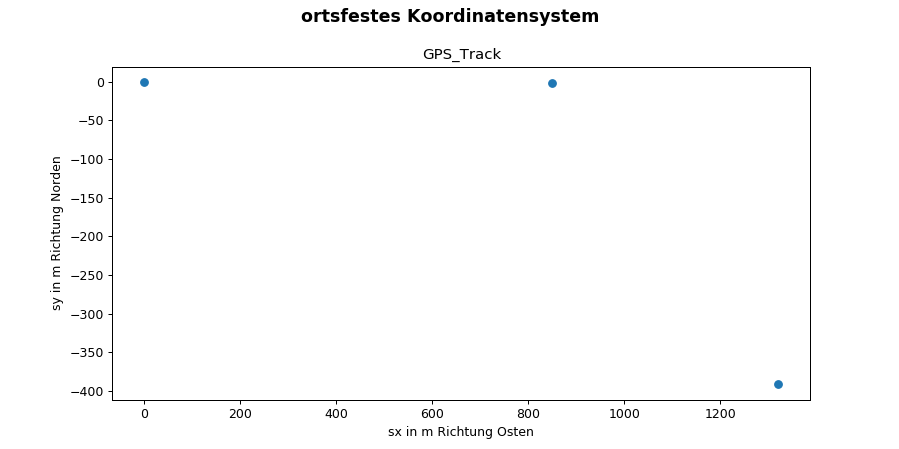

In [9]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('ortsfestes Koordinatensystem', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

ax = fig.add_subplot(111)
ax.set_title('GPS_Track')
ax.set_xlabel('sx in m Richtung Osten')
ax.set_ylabel('sy in m Richtung Norden')
ax.plot(cartcoord.x,cartcoord.y,'o')

#plt.scatter(x, y)
plt.show()

In [10]:
cartarray = cartcoord.values
cp1 = cartcoord.values[0]
cp2 = cartcoord.values[1]
cp3 = cartcoord.values[2]

# calculate radius and middlepoint from given three gps coodinates

In [29]:
#Berechnung Mittelpunkt GPS_Koordinaten von drei GPS-Koordinaten
def calc_middlepoint_three_gpscoordinates(p1,p2,p3):
    A = np.array(p1)
    B = np.array(p2)
    C = np.array(p3)
    a = np.linalg.norm(C-B)
    b = np.linalg.norm(C-A)
    c = np.linalg.norm(B-A)
    b1 = a*a * (b*b + c*c - a*a)
    b2 = b*b * (a*a + c*c - b*b)
    b3 = c*c * (a*a + b*b - c*c)
    P = np.column_stack((A, B, C)).dot(np.hstack((b1, b2, b3)))
    P /= b1 + b2 + b3
    d = math.sqrt(P[0]**2+P[1]**2)
    return P,d
mp = calc_middlepoint_three_gpscoordinates(cp1,cp2,cp3)
mp[1]

1085.1969793474204

# calculate gps coordinates from given gps point and distance

In [17]:
#Berechnung GPS Punkt durch Abstand und GPS Punkt
def calc_gpspoint_from_distance_and_gpspoint(p1,s):
  
    latp,lonp = p1
    sx = mp[0][0]
    sy = mp[0][1]
    print(sx,sy)
    print(latp,lonp)
    #radius der Erde
    R = 6378137.0
    #Exzentrizität
    en = 0.0818191908426
    #Pi, sin
    pi = math.pi
    #Radius Richtung Norden
    Rn = (R*(1-en*en))/((1-en*en*math.sin(latp)*math.sin(latp))**1.5)
    #Radius Richtung Osten
    Ro = R/((1-en**2*math.sin(latp)**2)**(0.5))
    #Skalierungsfaktor Norden in m/° Abstand in Meter nach Norden, zwischen Breitengraden
    SFn=Rn*(pi/180)
    #Skalierungsfaktor Osten in m/° Abstand in Meter nach Osten, zwischen Längengraden
    SFo=Ro*(pi/180)*math.cos(latp*pi/180)        
    lon = sx/SFo+lonp
    lat = sy/SFn+latp  
    P = (lat,lon)
    return P

gp = calc_gpspoint_from_distance_and_gpspoint(gpsp1,mp)

422.224004039 -999.689639037
47.6759701914 10.3931548094


# calculate distance from two given gps points

In [18]:
#Berechnung Radius des Kreise von drei Koordinaten
def calc_distance_two_gpspoints(p1,p2):
    #radius der Erde
    R = 6378137.0
    #Exzentrizität
    en = 0.0818191908426
    #Pi, sin
    pi = math.pi
    #Radius Richtung Norden
    Rn = (R*(1-en*en))/((1-en*en*math.sin(p2[0])*math.sin(p2[0]))**1.5)
    #Radius Richtung Osten
    Ro = R/((1-en**2*math.sin(p2[0])**2)**(0.5))
    #Skalierungsfaktor Norden in m/° Abstand in Meter nach Norden, zwischen Breitengraden
    SFn=Rn*(pi/180)
    #Skalierungsfaktor Osten in m/° Abstand in Meter nach Osten, zwischen Längengraden
    SFo=Ro*(pi/180)*math.cos(p2[0]*pi/180)
    #Abstand zwischen den beiden GPS-Punkten in Y-Richtung Norden in Meter
    Sx = (p2[1]-p2[1])*SFo
    #Abstand zwischen den beiden GPS-Punkten in X-Richtung Osten in Meter
    Sy = (p1[0]-p2[0])*SFn
    #Distanz zwischen den beiden GPS-Punkten
    s = math.sqrt(Sy*Sy+Sx*Sx)
    return s

r = calc_distance_two_gpspoints(gpsp1,gp)
r

999.6090377943029

In [30]:
#Create Object of map 
#Folium defaults to OpenStreetMap tiles, but Stamen Terrain, Stamen Toner, Mapbox Bright, and Mapbox Control room tiles are built in:
map_osm = folium.Map(location=[gp[0],gp[1]],zoom_start=11)
#add markers
#for each in points:
folium.Marker(location=[lat1, lon1]).add_to(map_osm)
folium.Marker(location=[lat2, lon2]).add_to(map_osm)
folium.Marker(location=[lat3, lon3]).add_to(map_osm)

#Add middlepoint 
folium.Circle(
    radius = mp[1],
    location = [gp[0], gp[1]],
    popup='radius',
    color='#3186cc',
    fill=False,
).add_to(map_osm)

map_osm